In [1]:
import os
from scipy.io import loadmat
import matplotlib.pyplot as plt
import cv2

from data import soccer_net
from image import image
import numpy as np

/Users/aleksandernagaj/.venv/FootAndBall/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
annot = loadmat("data/bmvc17/annotation_1.mat")
annotations = annot["annot"][0][0][0]
annotations

FileNotFoundError: [Errno 2] No such file or directory: 'data/bmvc17/annotation_1.mat'

In [3]:

img = cv2.imread(f"data/bmvc17/DataSet_001/0186.jpg")
img = image.draw_bboxes(img, annotations, image.Color.RED)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis("off")
plt.show()

[ WARN:0@14.485] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data/bmvc17/DataSet_001/0186.jpg'): can't open/read file: check file path/integrity


NameError: name 'annotations' is not defined

In [2]:
soccer_net_path = "/Users/aleksandernagaj/DTU/02456/data/soccer_net/tracking/train/"

sn = soccer_net.SoccerNet(soccer_net_path)
sn.collect(["SNMOT-061"])

In [3]:
sn.image_list

['SNMOT-061/img1/000001.jpg',
 'SNMOT-061/img1/000002.jpg',
 'SNMOT-061/img1/000003.jpg',
 'SNMOT-061/img1/000004.jpg',
 'SNMOT-061/img1/000005.jpg',
 'SNMOT-061/img1/000006.jpg',
 'SNMOT-061/img1/000007.jpg',
 'SNMOT-061/img1/000008.jpg',
 'SNMOT-061/img1/000009.jpg',
 'SNMOT-061/img1/000010.jpg',
 'SNMOT-061/img1/000011.jpg',
 'SNMOT-061/img1/000012.jpg',
 'SNMOT-061/img1/000013.jpg',
 'SNMOT-061/img1/000014.jpg',
 'SNMOT-061/img1/000015.jpg',
 'SNMOT-061/img1/000016.jpg',
 'SNMOT-061/img1/000017.jpg',
 'SNMOT-061/img1/000018.jpg',
 'SNMOT-061/img1/000019.jpg',
 'SNMOT-061/img1/000020.jpg',
 'SNMOT-061/img1/000021.jpg',
 'SNMOT-061/img1/000022.jpg',
 'SNMOT-061/img1/000023.jpg',
 'SNMOT-061/img1/000024.jpg',
 'SNMOT-061/img1/000025.jpg',
 'SNMOT-061/img1/000026.jpg',
 'SNMOT-061/img1/000027.jpg',
 'SNMOT-061/img1/000028.jpg',
 'SNMOT-061/img1/000029.jpg',
 'SNMOT-061/img1/000030.jpg',
 'SNMOT-061/img1/000031.jpg',
 'SNMOT-061/img1/000032.jpg',
 'SNMOT-061/img1/000033.jpg',
 'SNMOT-06

SNMOT-061/img1/000001.jpg


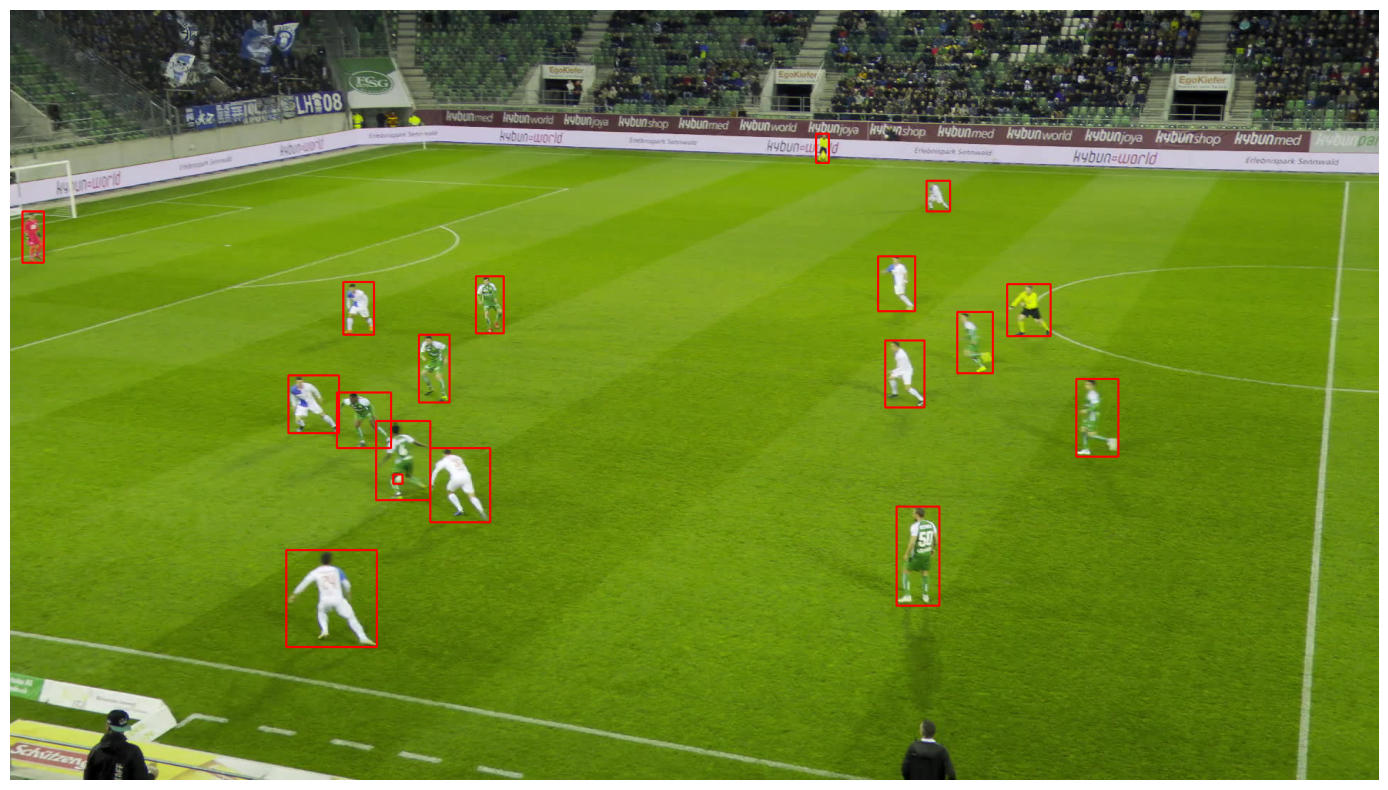

In [4]:
for img_path, ann in zip(sn.image_list, sn.gt):
    print(img_path)
    img = cv2.imread(soccer_net_path + img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = image.draw_bboxes(img, ann, image.Color.RED)

    plt.figure(figsize=(20, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    break
    

In [1]:
import pickle

with open("data/training_stats_model_20221118_1827.pickle", "rb") as rfile:
    data = pickle.load(rfile)



FileNotFoundError: [Errno 2] No such file or directory: 'data/training_stats_model_20221118_1827.pickle'

In [3]:
data["train"][-1]

{'loss': 0.5819679627001884,
 'loss_ball_c': 0.56433352892502,
 'loss_player_c': 0.6759565879768352,
 'loss_player_l': 0.0003335813814912374}

In [2]:
import torch

print(torch.backends.mps.is_available())
print(torch.backends.mps.is_built())

True
True


In [5]:
import pickle

with open("runs/train/20221123_2305/training_stats.pickle", "rb") as rfile:
    data = pickle.load(rfile)

In [6]:
data["train"][-1]

{'loss': 1.5154870167922814,
 'loss_ball_c': 1.7169028033181577,
 'loss_player_c': 0.5235618697012149,
 'loss_player_l': 0.0001333233746624066}